For this problem, we are given a mized signal of cosine waves. Our task is to extract the components, find the dominant components and plot each of them over the first 10 seconds

First we import the necessary libraries numpy, pandas, and matplotlib.pyplot for numerical computation, data analysis, and data visualization, respectively.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Now, we read our given csv file for the data and we extract the data into two variable for easier calculation

In [3]:
data = pd.read_csv('Prob1.csv')
time = data['time'].values
signal = data['signal'].values
data.head()

,time,signal
0,0.0,8.438860
1,0.1,0.990973
2,0.2,-3.004597
3,0.3,5.558490
4,0.4,4.669245


Now we compute the Fourier transform of the input signal using the FFT algorithm and stores the result in fft

In [37]:
fft = np.fft.fft(signal)

Now, compute the frequencies that correspond to the Fourier coefficients in fft using fftfreq function. It takes the size of the input signal and the time step between consecutive samples as arguments and stores the result in freq.

In [38]:
freq = np.fft.fftfreq(signal.size, time[1] - time[0])

The next line of code finds the indices of the highest magnitude Fourier coefficients in fft using NumPy's argsort function. The argsort function returns the indices that would sort the input array in ascending order

In [39]:
max_indices = np.argsort(np.abs(fft))[::-1][:8]

C:\Users\shouv\AppData\Local\Temp\ipykernel_15224\2704123292.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, np.abs(fft))


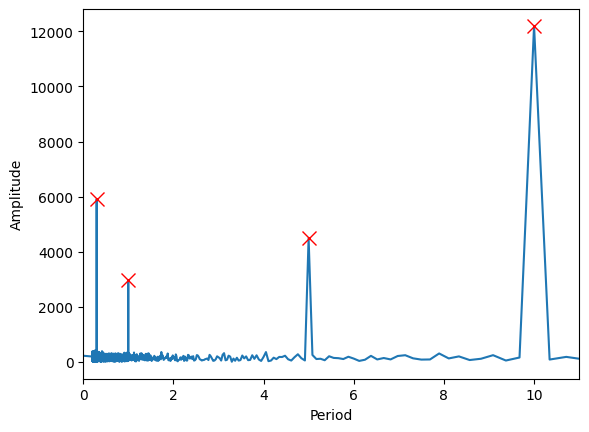

In [44]:
plt.plot(1/freq, np.abs(fft))
plt.xlim([0,11])
plt.xlabel('Period')
plt.ylabel('Amplitude')

# Find the peaks in the Fourier spectrum
peaks, _ = find_peaks(np.abs(fft[::-1]), height=2000)
periods = 1/freq[::-1][peaks]
amplitudes = np.abs(fft[::-1][peaks])
plt.plot(periods, amplitudes, 'x', color='red', markersize=10)

plt.show()

From the plot, it is clearly seen that that there are 4 dominant component of the signal.

Now, we extract the periods, the amplitudes and the phases of the dominant component to complete the rest of the problem

In [45]:
periods = 1.0 / freq[max_indices]
amplitudes = np.abs(fft[max_indices]) / signal.size
phases = np.angle(fft[max_indices])

Using a loop, we now print the period, amplitude and the phase of each component

In [41]:
for i in range(len(periods)):
    if periods[i]> 0:
        print('Component {}:'.format(i+1))
        print('Period = {:.2f} s'.format(periods[i]))
        print('Amplitude = {:.2f}'.format(amplitudes[i]))
        print('Phase = {:.2f} rad'.format(phases[i]))
        print()

Component 1:
Period = 10.00 s
Amplitude = 4.07
Phase = -1.56 rad

Component 3:
Period = 0.30 s
Amplitude = 1.97
Phase = 0.01 rad

Component 5:
Period = 5.00 s
Amplitude = 1.50
Phase = -1.59 rad

Component 8:
Period = 1.00 s
Amplitude = 0.99
Phase = -0.03 rad



Now, we plot each of these components over the first 10 seconds on the same graph. 

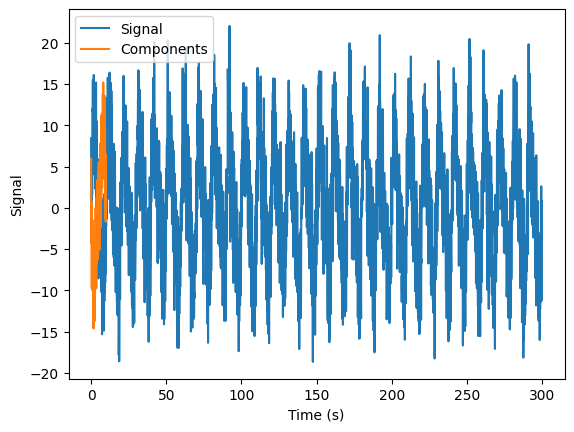

In [42]:
t = np.linspace(0, 10, 1000)
y = np.zeros_like(t)
for i in range(len(periods)):
    y += amplitudes[i] * np.cos(2*np.pi*t/periods[i] - phases[i])
plt.plot(time, signal, label='Signal')
plt.plot(t, y, label='Components')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()